# ANSWERING QUESTION
---

Nhiệm vụ phần này: Đặt các câu hỏi có ý nghĩa, giải thích tại sao cần trả lời câu hỏi này và phân tích để trả lời câu hỏi.

Import các thư viện cần thiết

In [85]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('../Data/movie_data.csv')
df.head()

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action,Adventure,Animation,...,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12430.6658,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.0000,False,True,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.0000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.0000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.0000,False,False,False,...,True,False,False,False,False,False,False,0.0,0.0,1


## CÂU 1: VỚI TỪNG THỂ LOẠI KHÁC NHAU THÌ ĐÁNH GIÁ CỦA KHÁN GIẢ KHÁC NHAU NHƯ THẾ NÀO ? CÓ NHỮNG THỂ LOẠI PHIM NÀO TRONG SỐ NHỮNG THỂ LOẠI PHIM CÓ ĐÁNH GIÁ CAO NHẤT THƯỜNG XUYÊN KẾT HỢP VỚI NHAU?

Trả lời câu hỏi này giúp chúng ta tìm hiểu đánh giá của khán giả với từng thể loại phim khác nhau, từ đó phần nào diễn giáỉ sở thích, khẩu vị xem phim của họ. 

Để trả lời câu hỏi này chúng ta sẽ sử dụng dữ liệu của cột IMDb Ratings, IMDb Votes và 13 cột thể loại phim để tính đánh giá trung bình và số lượt bình chọn cho từng thể loại.

In [92]:
data = df.copy()

genre_columns = ['Action', 
                 'Adventure', 
                 'Animation',
                 'Biography', 
                 'Comedy', 
                 'Crime', 
                 'Documentary', 
                 'Drama', 
                 'Family',
                 'Fantasy', 
                 'History', 
                 'Horror', 
                 'Music', 
                 'Musical',
                 'Mystery', 
                 'Romance', 
                 'Sci-Fi', 
                 'Short', 
                 'Sport',
                 'Thriller', 
                 'War', 
                 'Western']

In [93]:
C = data['IMDb Votes'].mean()
m = data['IMDb Rating'].mean()

genre_avg_rating = []

for genre in genre_columns:
    filtered_movies = data[data[genre] == 1]
    total_votes = filtered_movies['IMDb Votes'].sum()
    total_movie = filtered_movies['IMDb Rating'].count()

    # Bayesian Average
    bayesian_avg = (C * m + (filtered_movies['IMDb Rating'] * filtered_movies['IMDb Votes']).sum()) / (C + total_votes)
    genre_avg_rating.append((genre, total_movie, bayesian_avg))

avg_rating_df = pd.DataFrame(genre_avg_rating, columns = ['Genre', 'Total Movie', 'Average Rating'])

In [94]:
genre_most_movie = avg_rating_df.sort_values(by='Total Movie', ascending=True)
avg_rating_df.sort_values(by='Average Rating', ascending=True, inplace=True)

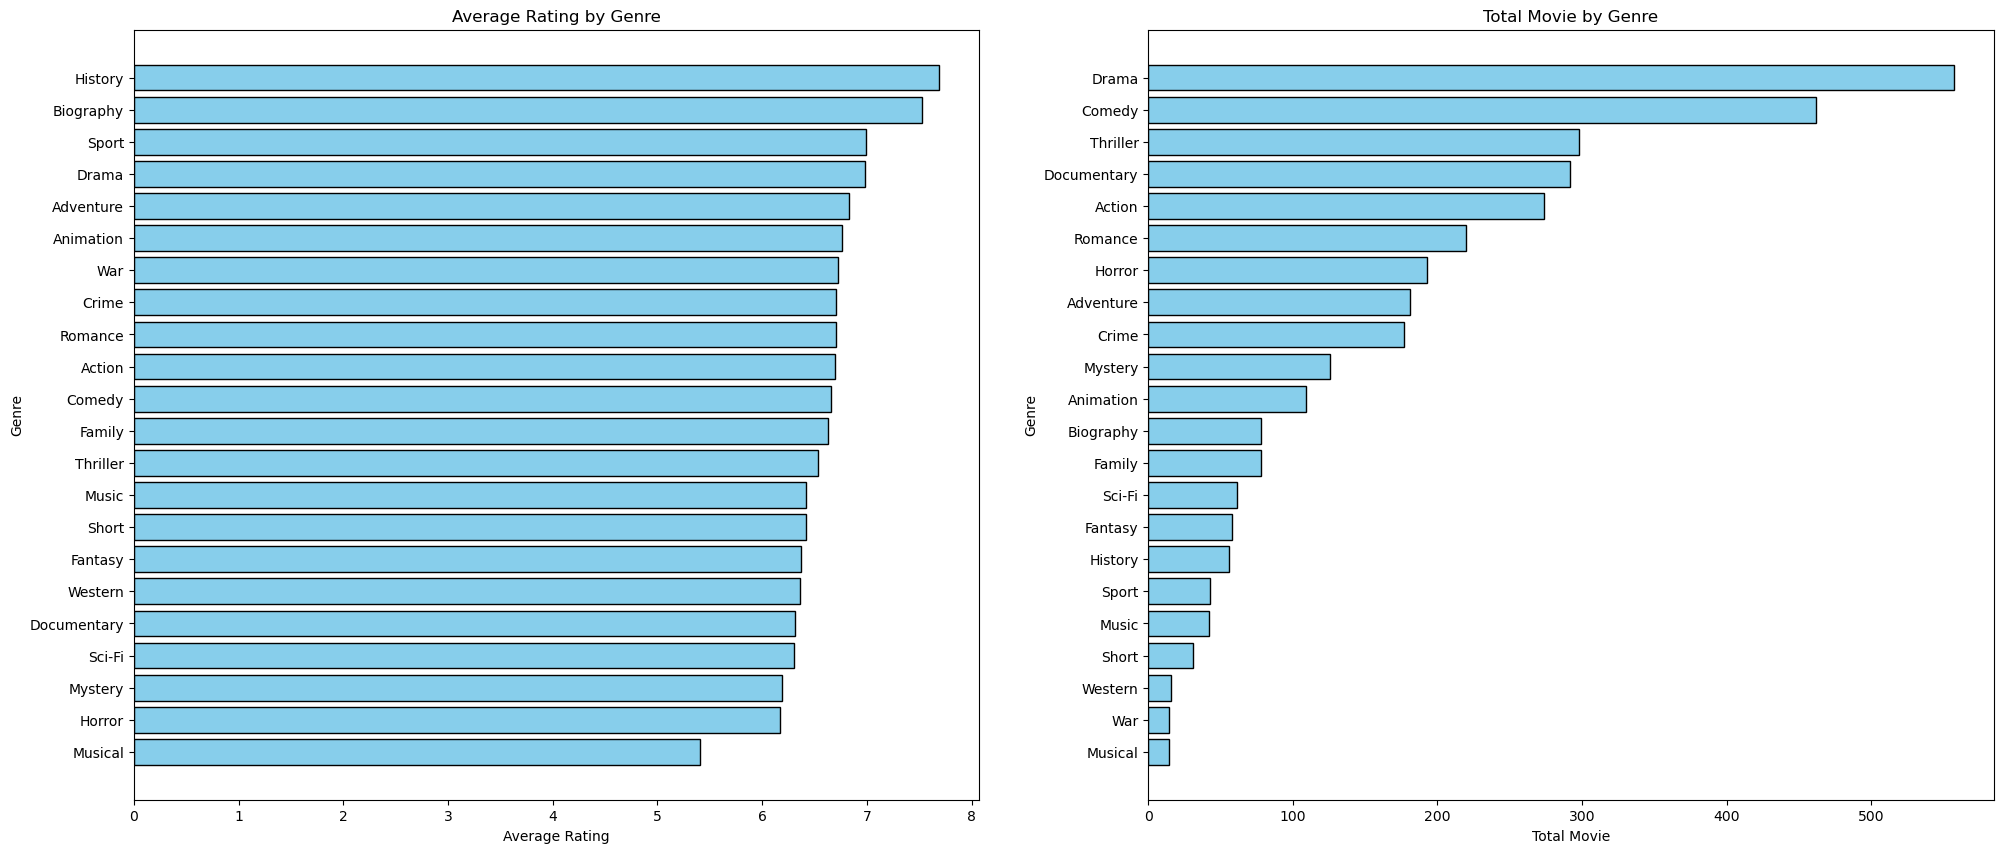

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))  

ax[0].barh(avg_rating_df['Genre'], avg_rating_df['Average Rating'], color='skyblue', edgecolor='black')
ax[0].set_xlabel('Average Rating')
ax[0].set_ylabel('Genre')
ax[0].set_title('Average Rating by Genre')


ax[1].barh(genre_most_movie['Genre'], genre_most_movie['Total Movie'], color='skyblue', edgecolor='black')
ax[1].set_xlabel('Total Movie')
ax[1].set_ylabel('Genre')
ax[1].set_title('Total Movie by Genre')

plt.show()

- Về số lượng phim mỗi thể loại:
    + Số lượng phim có chênh lệch khá lớn với nhiều thể loại có số lượng phim rất nhiều, hơn 400 bộ phim và nhiều thể loại lại có số lượng phim rất ít, nhỏ hơn 50 bộ phim. 
    + Thể loại phim có nhiều bộ phim nhất là Drama với hơn 500 bộ phim thuộc thể loại này, tiếp theo là Comedy cũng có số lượng phim rất cao. Hai thể loại gần như áp đảo các thể loại phim khác.
    + Thể loại phim có ít bộ phim nhất là Musical, War và Western với ít hơn 50 bộ phim thuộc thể loại này. 

    => Giải thích thể loại được chú trọng sản xuất và không được chú trọng sản xuất.

- Về điểm trung bình mỗi thể loại:
    + Phổ điểm có sự chênh lệch nhưng không quá lớn, trải đều từ ~5.5 tới ~8 điểm.
    + Các thể loại phim óc xếp hạng trung bình cao nhất là History và Biography với mức điểm trên 7 điểm.
    + Thể loại có điểm thấp nhất là Musical, với điểm số ~5.5 điểm. 

    => Các thể loại phim mang tính lịch sử, tiểu sử, và thể thao thường nhận được đánh giá cao hơn từ người xem, có thể vì nội dung ý nghĩa, truyền cảm hứng hoặc chất lượng sản xuất tốt.

- Insght:
    + Số lượng và chất lượng không tương quan mạnh mẽ: Mặc dù Drama là thể loại có số lượng phim lớn nhất, nhưng xếp hạng trung bình của nó chỉ ở mức khá (xếp thứ 4 trong biểu đồ bên trái). Ngược lại, các thể loại như History, Biography, và Sport tuy có số lượng phim thấp hơn nhưng lại có xếp hạng trung bình rất cao. Điều này cho thấy số lượng phim lớn không đảm bảo chất lượng trung bình cao.

    + Các thể loại ít nhưng chất lượng: Các thể loại như History, Biography và Sport thường hướng đến đối tượng khán giả cụ thể, nhưng nội dung có chiều sâu và ý nghĩa. Đây là các thể loại mà nhà sản xuất có thể tập trung đầu tư để tạo ra những bộ phim chất lượng, vì khán giả có xu hướng đánh giá cao.

    + Các thể loại không được đánh giá cao: Thể loại Sci-Fi, Horror và Musical vừa có xếp hạng trung bình thấp, vừa có số lượng phim ít. Điều này có thể phản ánh rằng các thể loại này chưa đáp ứng được kỳ vọng của khán giả.


Kết luận:
- Nhà sản xuất nên tập trung vào các thể loại có xếp hạng trung bình cao nhưng chưa được khai thác nhiều như History, Biography, Sport, và War.
- Đối với các thể loại phổ biến như Drama và Comedy, cần cải thiện chất lượng để nâng cao mức độ hài lòng của khán giả.
- Các thể loại như Horror và Musical cần được xem xét kỹ hơn để cải thiện chất lượng nội dung và tiếp cận đối tượng khán giả tiềm năng.

- Thể loại kịch:
    +Khả năng khai thác chủ đề phong phú: Kịch có thể đề cập đến rất nhiều chủ đề và vấn đề xã hội khác nhau, từ gia đình, tình yêu, mâu thuẫn cá nhân đến các vấn đề chính trị và xã hội. Nhờ đó, kịch dễ dàng kết nối với cảm xúc và trải nghiệm của khán giả.

    + Tập trung vào phát triển nhân vật: Kịch thường xây dựng các nhân vật phức tạp với bối cảnh và động cơ rõ ràng. Điều này tạo cơ hội cho người xem hiểu sâu hơn về tâm lý và cảm xúc của nhân vật, làm tăng tính hấp dẫn của câu chuyện.

    + Cảm xúc mạnh mẽ: Kịch thường gây ra những cảm xúc sâu sắc và có thể khiến khán giả suy ngẫm, tạo ra những trải nghiệm đáng nhớ. Các tình huống căng thẳng và mâu thuẫn trong kịch thường khiến người xem cảm thấy gắn bó hơn với câu chuyện.

    + Khả năng đa dạng hóa: Kịch có thể kết hợp với nhiều thể loại khác nhau, như hài kịch, lãng mạn, hành động, hoặc hồi hộp, tạo ra những tác phẩm phong phú và đa dạng. Điều này mở rộng sức hấp dẫn của thể loại kịch.

    + Phù hợp với nhiều đối tượng khán giả: Kịch có thể phục vụ cho nhiều độ tuổi và khẩu vị khác nhau. Các câu chuyện trong thể loại này có thể rất đa dạng và phù hợp với nhiều bối cảnh văn hóa khác nhau.



- War, Sport:
    + Chủ đề hạn chế: Phim chiến tranh thường tập trung vào các tình huống cụ thể xoay quanh xung đột vũ trang. Số lượng các cuộc chiến tranh lớn có thể khai thác là có hạn.
    + Nhu cầu đặc biệt: Những bộ phim về thể thao thường tập trung vào các sự kiện nhất định và có thể bị hạn chế về khía cạnh nội dung nếu không có một câu chuyện mạnh mẽ.

    + Nhu cầu chi phí cao: Sản xuất phim chiến tranh thường yêu cầu hiệu ứng đặc biệt, bối cảnh quy mô lớn và dàn diễn viên hùng hậu, dẫn đến chi phí sản xuất cao.

- Music và Musical:
    + Thị hiếu khán giả: Không phải ai cũng thích nhạc, do đó thị trường cho thể loại phim này thường bị hạn chế hơn.    

- Short:
    + Thời lượng hạn chế


## CÂU 2: VÀO CÁC THỜI ĐIỂM TRONG NĂM (THÁNG/QUÝ) THÌ THỂ LOẠI PHIM NÀO ĐƯỢC RA MẮT NHIỀU NHẤT ? 

Trả lời câu hỏi này giúp chúng ta tìm hiểu về tương quan giữa thể loại và thời điểm nó được ra mắt, từ đó tìm hiểu về xu hướng phim theo các thời điểm đặc biệt trong năm (theo mùa / theo quý, theo dịp đặc biệt).

Để trả lời câu hỏi này chúng ta sẽ sử dụng dữ liệu của cột **Released time** và 13 cột Thể loại để xác định top 5 thể loại ra mắt nhiều nhất vào từng thời điểm.

## Câu 3: Các phim thuộc thể loại nào có nhiều khả năng được đề cử hoặc giành giải thưởng nhất?

Trả lời câu hỏi này: 
- Giúp các nhà làm phim tập trung sản xuất những nội dung phù hợp để tối đa hóa cơ hội thành công.
- Giúp khán giả lựa chọn các bộ phim theo sở thích và tiềm năng chất lượng.

- Tính tổng số "Win" và "Nomination" theo từng thể loại.
- Tính tỷ lệ giữa số phim giành giải và tổng số phim trong từng thể loại.
- Biểu đồ để minh họa sự phân bố giải thưởng theo các thể loại như "Drama", "Biography/History/War", "Animation"...

## Câu 4: Xếp hạng tuổi (Age rating) ảnh hưởng thế nào đến mức độ phổ biến (số lượt bình chọn IMDb Votes)?

Trả lời câu hỏi này: 
- Hiểu tác động của đối tượng khán giả mục tiêu đến mức độ phổ biến của phim.
- Giúp điều chỉnh nội dung phù hợp với đối tượng mục tiêu để tăng sức hút thị trường.

- Nhóm dữ liệu theo cột Age rating và tính trung bình số lượng IMDb Votes.
- So sánh mức độ phổ biến giữa các nhóm tuổi khác nhau.
- Có thể mở rộng để xem xét tương quan giữa Age rating và các yếu tố khác như IMDb Rating, thể loại.

## CÂU 5: Thời lượng phim (Runtime) ảnh hưởng như thế nào đến số lượng IMDb Votes và IMDb Rating?

Thời lượng phim là một yếu tố khá quan trọng vì nó ảnh hưởng đến trải nghiệm của người xem. Thời lượng dài có thể giúp phim phát triển cốt truyện chi tiết hơn, nhưng cũng tiềm ẩn nhiều nguy cơ như có thể làm giảm hứng thú nếu không được xây dựng tốt và tốn kém nhân lực và nguồn lực vì cần đầu tư nhiều hơn.

Trả lời câu hỏi này giúp chúng ta xác định thời lượng lý tưởng của một bộ phim để thu hút khán giả và đạt được điểm đánh giá cao.


Để trả lời câu hỏi này ta sẽ sử dụng 3 cột là **Runtime, IDMb Votes** và **IMDb Rating**
- Phân tích phân phối thời lượng phim.
- Xem sự tương quan giữa **Runtime** và 2 đặc trưng còn lại.
- Kiểm tra sự ảnh hưởng của thời lượng đến số lượt bình chọn và đánh giá. Liệu phim có thời lượng thế nào có xu hướng đạt được nhiều bình chọn hoặc đánh giá hơn không? 

## CÂU 6: Thể loại nào có xu hướng phát triển mạnh nhất qua các năm dựa trên số lượng phim phát hành?

Khi theo dõi xu hướng thị trường thì số lượng phim phát hành qua các năm sẽ phản ảnh được sự phát triển của từng thể loại trong ngành điện ảnh. Từ đó, giúp ta dự đoán thể loại nào sẽ tiếp tục phát triển, có khả năng phát triển hay sẽ trở nên lỗi thời. 

Trả lời câu hỏi này giúp dự đoán xu hướng phát triển của ngành công nghiệp điện ảnh để định hướng đầu tư vào các thể loại tiềm năng trong tương lai.

Để trả lời câu hỏi này ta cần 2 cột là **Release time** và 13 cột thể loại
- Tính tổng số lượng phim phát hành mỗi năm theo từng thể loại.
- Trực quan hóa xu hướng của mỗi thể loại qua các năm để so sánh sự thay đổi về số lượng phim phát hành của từng thể loại.
- Phân tích sự tăng trưởng hay suy giảm của từng thể loại để xác định thể loại nào tăng trưởng nhanh hay đang xuống dốc
- Uớc tính số lượng phim phát hành của từng thể loại trong các năm tiếp theo.

## CÂU 7: Mối liên hệ giữa `IMDb Rating` và số phiếu đánh giá `IMDb Votes` là gì?

Trả lời câu hỏi này sẽ giúp ta tìm hiểu mối quan hệ giữa `IMDb Rating` và `IMDb Votes` giúp phân tích liệu mức độ phổ biến (thông qua số lượng phiếu bầu) có ảnh hưởng đến chất lượng đánh giá hay không. Nếu có, điều này có thể giúp dự đoán phim nào sẽ được yêu thích hơn hoặc đạt rating cao hơn dựa trên xu hướng phiếu bầu.

Để trả lời câu hỏi này, cần sử dụng các cột: `IMDb Rating`, `IMDb Votes`

Cách làm:
- Vẽ biểu đồ scatter plot giữa 2 cột để trực quan hóa mối quan hệ
- Tính hệ số tương quan để xác định mức độ ảnh hưởng

## CÂU 8: Thể loại phim nào có xu hướng phù hợp với từng nhóm tuổi `Age rating`?

Trả lời cho câu hỏi này giúp định hướng sản xuất phim phù hợp với các đối tượng khán giả khác nhau, tối ưu hóa nội dung và marketing theo độ tuổi.

Để trả lời câu hỏi này, ta cần sử dụng cột `Age rating` và 13 cột thể loại.

Cách làm:
- Nhóm dữ liệu theo `Age rating`
- Đếm tần suất xuất hiện của từng thể loại trong mỗi nhóm tuổi
- Tạo biểu đồ heatmap thể hiện mối quan hệ giữa nhóm tuổi và thể loại

## CÂU 9: Khoảng thời lượng phim nào phổ biến nhất (ví dụ: 10–20 phút, 20–30 phút, ...) và số lượng phim trong khoảng đó là bao nhiêu?

Trả lời câu hỏi này: 
- Giúp phân tích xu hướng về độ dài của phim, từ đó hiểu rõ hơn về sự lựa chọn phổ biến của các nhà sản xuất và thị hiếu khán giả.
- Hữu ích cho các nhà làm phim khi lên kế hoạch sản xuất nếu họ muốn sản xuất phim phù hợp với xu hướng hiện tại.

## CÂU 10: Tháng nào trong năm được tổng số lượt bình chọn người dùng nhiều nhất?

Trả lời câu hỏi này: 
- Xác định các tháng mà khán giả dành nhiều thời gian hơn để xem phim và bình chọn trên IMDb, từ đó phản ánh mức độ quan tâm của khán giả trong từng tháng
- Giúp nhà sản xuất lên lịch phát hành phim vào các tháng có tương tác cao nhất, nhằm tối ưu hóa lượt xem và đánh giá